# Python tech for distributions

##### Keywords: bernoulli distribution, uniform distribution, empirical distribution, elections

In [5]:
# The %... is an iPython thing, and is not part of the Python language.
# In this case we're just telling the plotting library to draw things on
# the notebook, instead of on a separate window.
%matplotlib inline
# See all the "as ..." contructs? They're just aliasing the package names.
# That way we can call methods like plt.plot() instead of matplotlib.pyplot.plot().
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import pandas as pd
import seaborn.apionly as sns

Let us consider a table of probabilities that [PredictWise](http://www.predictwise.com/results/2012/president) made on October 2, 2012 for the US presidential elections. 
PredictWise aggregated polling data and, for each state, estimated the probability that the Obama or Romney would win. Here are those estimated probabilities, loaded inmto a `pandas` dataframe:

In [47]:
predictwise = pd.read_csv('data/predictwise.csv')
predictwise.head()

,Obama,Romney,States,Votes
0,0.000,1.000,Alabama,9
1,0.000,1.000,Alaska,3
2,0.062,0.938,Arizona,11
3,0.000,1.000,Arkansas,6
4,1.000,0.000,California,55


We can set the states as an index..after all, each state has a unique name.

In [39]:
predictwise = predictwise.set_index('States')
predictwise

,Obama,Romney,Votes
States,,,
Alabama,0.000,1.000,9
Alaska,0.000,1.000,3
Arizona,0.062,0.938,11
Arkansas,0.000,1.000,6
California,1.000,0.000,55
Colorado,0.807,0.193,9
Connecticut,1.000,0.000,7
Delaware,1.000,0.000,3
District of Columbia,1.000,0.000,3


## numpy

Lets do a short intro to numpy. You can obtain a numpy array from a Pandas dataframe:

In [40]:
predictwise.Obama.values

array([ 0.   ,  0.   ,  0.062,  0.   ,  1.   ,  0.807,  1.   ,  1.   ,
        1.   ,  0.72 ,  0.004,  1.   ,  0.   ,  1.   ,  0.036,  0.837,
        0.   ,  0.   ,  0.   ,  1.   ,  1.   ,  1.   ,  0.987,  0.982,
        0.   ,  0.074,  0.046,  0.   ,  0.851,  0.857,  0.998,  0.985,
        1.   ,  0.349,  0.025,  0.89 ,  0.   ,  0.976,  0.978,  1.   ,
        0.   ,  0.001,  0.001,  0.   ,  0.   ,  1.   ,  0.798,  0.999,
        0.002,  0.925,  0.   ])

A numpy array has a shape:

In [41]:
predictwise.Obama.values.shape

(51,)

And a type...this makes them efficient...

In [42]:
predictwise.Obama.values.dtype

dtype('float64')

You can construct a dub-dataframe in pandas with this strange selection notation below:

In [43]:
predictwise[['Obama', 'Romney']]

,Obama,Romney
States,,
Alabama,0.000,1.000
Alaska,0.000,1.000
Arizona,0.062,0.938
Arkansas,0.000,1.000
California,1.000,0.000
Colorado,0.807,0.193
Connecticut,1.000,0.000
Delaware,1.000,0.000
District of Columbia,1.000,0.000


...and when you get the `.values`, you get a 2D numpy array (see further down in this document)

In [45]:
predictwise[['Obama', 'Romney']].values

array([[ 0.   ,  1.   ],
       [ 0.   ,  1.   ],
       [ 0.062,  0.938],
       [ 0.   ,  1.   ],
       [ 1.   ,  0.   ],
       [ 0.807,  0.193],
       [ 1.   ,  0.   ],
       [ 1.   ,  0.   ],
       [ 1.   ,  0.   ],
       [ 0.72 ,  0.28 ],
       [ 0.004,  0.996],
       [ 1.   ,  0.   ],
       [ 0.   ,  1.   ],
       [ 1.   ,  0.   ],
       [ 0.036,  0.964],
       [ 0.837,  0.163],
       [ 0.   ,  1.   ],
       [ 0.   ,  1.   ],
       [ 0.   ,  1.   ],
       [ 1.   ,  0.   ],
       [ 1.   ,  0.   ],
       [ 1.   ,  0.   ],
       [ 0.987,  0.013],
       [ 0.982,  0.018],
       [ 0.   ,  1.   ],
       [ 0.074,  0.926],
       [ 0.046,  0.954],
       [ 0.   ,  1.   ],
       [ 0.851,  0.149],
       [ 0.857,  0.143],
       [ 0.998,  0.002],
       [ 0.985,  0.015],
       [ 1.   ,  0.   ],
       [ 0.349,  0.651],
       [ 0.025,  0.975],
       [ 0.89 ,  0.11 ],
       [ 0.   ,  1.   ],
       [ 0.976,  0.024],
       [ 0.978,  0.022],
       [ 1.   ,  0.   ],


A "reshape" can convert a 1-D numpy array into a 2D one...

In [46]:
predictwise['Obama'].values.reshape(-1,1)

array([[ 0.   ],
       [ 0.   ],
       [ 0.062],
       [ 0.   ],
       [ 1.   ],
       [ 0.807],
       [ 1.   ],
       [ 1.   ],
       [ 1.   ],
       [ 0.72 ],
       [ 0.004],
       [ 1.   ],
       [ 0.   ],
       [ 1.   ],
       [ 0.036],
       [ 0.837],
       [ 0.   ],
       [ 0.   ],
       [ 0.   ],
       [ 1.   ],
       [ 1.   ],
       [ 1.   ],
       [ 0.987],
       [ 0.982],
       [ 0.   ],
       [ 0.074],
       [ 0.046],
       [ 0.   ],
       [ 0.851],
       [ 0.857],
       [ 0.998],
       [ 0.985],
       [ 1.   ],
       [ 0.349],
       [ 0.025],
       [ 0.89 ],
       [ 0.   ],
       [ 0.976],
       [ 0.978],
       [ 1.   ],
       [ 0.   ],
       [ 0.001],
       [ 0.001],
       [ 0.   ],
       [ 0.   ],
       [ 1.   ],
       [ 0.798],
       [ 0.999],
       [ 0.002],
       [ 0.925],
       [ 0.   ]])

You can construct a numpy array directly as well

In [48]:
my_array = np.array([1, 2, 3, 4])
my_array

array([1, 2, 3, 4])

**In general you should manipulate numpy arrays by using numpy module functions** (`np.mean`, for example). This is for efficiency purposes.

In [49]:
print(my_array.mean())
print(np.mean(my_array))

2.5
2.5


The way we constructed the numpy array above seems redundant. After all we already had a regular python list. Indeed, it is the other ways we have to construct numpy arrays that make them super useful. 

There are many such numpy array *constructors*. Here are some commonly used constructors. Look them up in the documentation.

In [50]:
print(np.ones(10))
np.ones(10, dtype='int') # generates 10 integer ones

[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [64]:
np.dtype(float).itemsize # in bytes

8

Numpy gains a lot of its efficiency from being typed. That is, all elements in the array have the same type, such as integer or floating point. The default type, as can be seen above, is a float of size appropriate for the machine (64 bit on a 64 bit machine).

In [51]:
print(np.zeros(10))
print(np.random.random(10))
normal_array = np.random.randn(1000)
print("The sample mean and standard devation are %f and %f, respectively." %(np.mean(normal_array), np.std(normal_array)))

[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.09500079  0.56750287  0.88898257  0.03858948  0.22709491  0.46560001
  0.9110299   0.87729626  0.47123426  0.64749469]
The sample mean and standard devation are 0.031173 and 0.986213, respectively.


Let's plot a histogram of this normal distribution

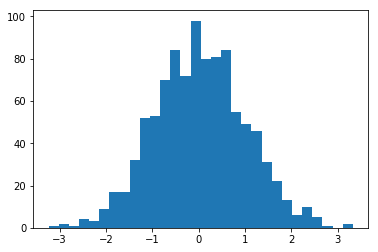

In [66]:
plt.hist(normal_array, bins=30);

You can normalize this histogram:

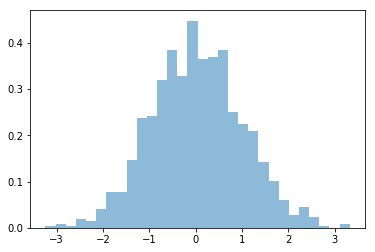

In [68]:
plt.hist(normal_array, bins=30, normed=True, alpha=0.5);

Even better, you can use Seaborn's distplot, which overlays a kernel density estimate.

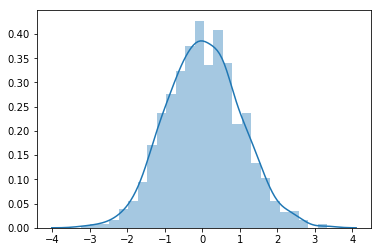

In [69]:
sns.distplot(normal_array)

In [52]:
grid = np.arange(0., 1.01, 0.1)
print(grid)
np.random.choice(grid, 5, replace=False)

[ 0.   0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9  1. ]


array([ 0.8,  0.1,  0.2,  0.4,  0.6])

In [54]:
np.random.choice(grid, 25, replace=True)

array([ 0. ,  0.8,  0. ,  0.6,  1. ,  0.6,  0. ,  0.8,  0.6,  0.3,  0.6,
        0. ,  0.7,  1. ,  0.6,  0.8,  0.2,  0.3,  0.2,  0.6,  0.6,  0.8,
        0.8,  0.6,  0.9])

#### Vector operations

What does this mean? It means that instead of adding two arrays, element by element, you can just say: add the two arrays. Note that this behavior is very different from python lists.

In [55]:
first = np.ones(5)
second = np.ones(5)
first + second

array([ 2.,  2.,  2.,  2.,  2.])

Numpy supports a concept known as *broadcasting*, which dictates how arrays of different sizes are combined together. There are too many rules to list here, but importantly, multiplying an array by a number multiplies each element by the number. Adding a number adds the number to each element.

In [56]:
print(first + 1)
print(first*4)
print(first*second) # itemwise
print(first@second) # dot product, identical to np.dot(first, second)

[ 2.  2.  2.  2.  2.]
[ 4.  4.  4.  4.  4.]
[ 1.  1.  1.  1.  1.]
5.0


#### 2D arrays
Similarly, we can create two-dimensional arrays.

In [57]:
my_array2d = np.array([ [1, 2, 3, 4], [5, 6, 7, 8], [9, 10, 11, 12] ])

# 3 x 4 array of ones
ones_2d = np.ones([3, 4])
print(ones_2d)
# 3 x 4 array of ones with random noise
ones_noise = ones_2d + .01*np.random.randn(3, 4)
print(ones_noise)
# 3 x 3 identity matrix
my_identity = np.eye(3)
print(my_identity)

[[ 1.  1.  1.  1.]
 [ 1.  1.  1.  1.]
 [ 1.  1.  1.  1.]]
[[ 0.99510521  0.99719296  0.99950497  0.99616235]
 [ 0.9913809   1.00196707  1.00545023  1.00486261]
 [ 1.01868421  0.99814142  1.00291637  0.99805381]]
[[ 1.  0.  0.]
 [ 0.  1.  0.]
 [ 0.  0.  1.]]


Numpy arrays have set length (array dimensions), can be sliced, and can be iterated over with loop.  Below is a schematic illustrating slicing two-dimensional arrays.  

 <img src="images/2dindex_v2.png" alt="Drawing" style="width: 500px;"/>

Earlier when we generated the one-dimensional arrays of ones and random numbers, we gave `ones` and `random`  the number of elements we wanted in the arrays. In two dimensions, we need to provide the shape of the array, ie, the number of rows and columns of the array.

In [58]:
onesarray = np.ones([3,4])
onesarray

array([[ 1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.]])

In [59]:
print(onesarray.shape)
onesarray.T

(3, 4)


array([[ 1.,  1.,  1.],
       [ 1.,  1.,  1.],
       [ 1.,  1.,  1.],
       [ 1.,  1.,  1.]])

In [60]:
onesarray.T.shape

(4, 3)

Matrix multiplication is accomplished by `np.dot` (or `@`). 

In [61]:
print(np.dot(onesarray, onesarray.T)) # 3 x 3 matrix
np.dot(onesarray.T, onesarray) # 4 x 4 matrix

[[ 4.  4.  4.]
 [ 4.  4.  4.]
 [ 4.  4.  4.]]


array([[ 3.,  3.,  3.,  3.],
       [ 3.,  3.,  3.,  3.],
       [ 3.,  3.,  3.,  3.],
       [ 3.,  3.,  3.,  3.]])

In [62]:
np.sum(onesarray)

12.0

The axis 0 is the one going downwards (the $y$-axis, so to speak), whereas axis 1 is the one going across (the $x$-axis). You will often use functions such as `mean`, `sum`, with an axis.

In [63]:
np.sum(onesarray, axis=0), np.sum(onesarray, axis=1)

(array([ 3.,  3.,  3.,  3.]), array([ 4.,  4.,  4.]))

## Simulating a simple election model


Say you toss a coin and have a model which says that the probability of heads is 0.5 (you have figured this out from symmetry, or physics, or something). Still, there will be sequences of flips in which more or less than half the flips are heads.  These **fluctuations** induce a distribution on the number of heads (say k) in N coin tosses (this is a binomial distribution).

Similarly, here, if the probability of Romney winning in Arizona is 0.938, it means that if somehow, there were 10000 replications (as if we were running the election in 10000 parallel universes) with an election each, Romney would win in 9380 of those Arizonas **on the average** across the replications. And there would be some replications with Romney winning more, and some with less. We can run these **simulated** universes or replications on a computer though not in real life.


To do this, 
we will assume that the outcome in each state is the result of an independent coin flip whose probability of coming up Obama is given by the Predictwise state-wise win probabilities. Lets write a function `simulate_election` that uses this **predictive model** to simulate the outcome of the election given a table of probabilities.

### Bernoulli Random Variables (in scipy.stats)

The **Bernoulli Distribution** represents the distribution for coin flips. Let the random variable X represent such a coin flip, where X=1 is heads, and X=0 is tails. Let us further say that the probability of heads is p (p=0.5 is a fair coin). 

We then say:

$$X \sim Bernoulli(p),$$

which is to be read as **X has distribution Bernoulli(p)**. The **probability distribution function (pdf)** or **probability mass function** associated with the Bernoulli distribution is

$$\begin{eqnarray}
P(X = 1) &=& p \\
P(X = 0) &=& 1 - p 
\end{eqnarray}$$

for p in the range 0 to 1. 
The **pdf**, or the probability that random variable $X=x$ may thus be written as 

$$P(X=x) = p^x(1-p)^{1-x}$$

for x in the set {0,1}.

The Predictwise probability of Obama winning in each state is a Bernoulli Parameter. You can think of it as a different loaded coin being tossed in each state, and thus there is a bernoulli distribution for each state

Note: **some of the code, and ALL of the visual style for the distribution plots below was shamelessly stolen from https://gist.github.com/mattions/6113437/ **.

[1 1 0 0 1 0 1 1 0 0 0 0 1 1 1 1 0 0 0 1]


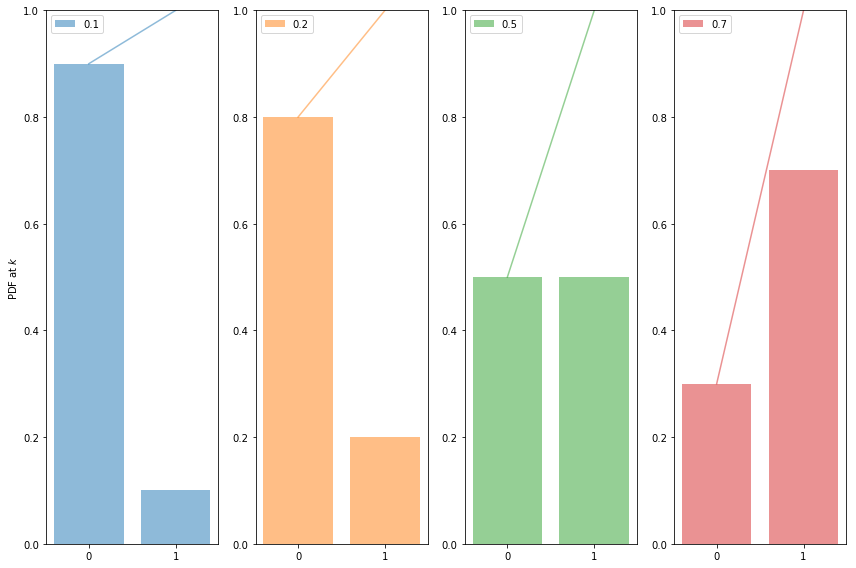

In [7]:
from scipy.stats import bernoulli
#bernoulli random variable
brv=bernoulli(p=0.3)
print(brv.rvs(size=20))
event_space=[0,1]
plt.figure(figsize=(12,8))
colors=sns.color_palette()
for i, p in enumerate([0.1, 0.2, 0.5, 0.7]):
    ax = plt.subplot(1, 4, i+1)
    plt.bar(event_space, bernoulli.pmf(event_space, p), label=p, color=colors[i], alpha=0.5)
    plt.plot(event_space, bernoulli.cdf(event_space, p), color=colors[i], alpha=0.5)

    ax.xaxis.set_ticks(event_space)
   
    plt.ylim((0,1))
    plt.legend(loc=0)
    if i == 0:
        plt.ylabel("PDF at $k$")
plt.tight_layout()

### Running the simulation using the Uniform distribution

In the code below, each column simulates a single outcome from the 50 states + DC by choosing a random number between 0 and 1. Obama wins that simulation if the random number is $<$ the win probability. If he wins that simulation, we add in the electoral votes for that state, otherwise we dont. We do this `n_sim` times and return a list of total Obama electoral votes in each simulation.

In [26]:
n_sim = 10000
simulations = np.random.uniform(size=(51, n_sim))
obama_votes = (simulations < predictwise.Obama.values.reshape(-1, 1)) * predictwise.Votes.values.reshape(-1, 1)
#summing over rows gives the total electoral votes for each simulation
obama_votes.sum(axis=0)

array([328, 319, 308, ..., 329, 272, 332])

The first thing to pick up on here is that `np.random.uniform` gives you a random number between 0 and 1, uniformly. In other words, the number is equally likely to be between 0 and 0.1, 0.1 and 0.2, and so on. This is a very intuitive idea, but it is formalized by the notion of the **Uniform Distribution**.

We then say:

$$X \sim Uniform([0,1),$$

which is to be read as **X has distribution Uniform([0,1])**. The **probability distribution function (pdf)** associated with the Uniform distribution is

\begin{eqnarray}
P(X = x) &=& 1 \, for \, x \in [0,1] \\
P(X = x) &=& 0 \, for \, x \notin [0,1]
\end{eqnarray}

What assigning the vote to Obama when the random variable **drawn** from the Uniform distribution is less than the Predictwise probability of Obama winning (which is a Bernoulli Parameter) does for us is this: if we have a large number of simulations and $p_{Obama}=0.7$ , then 70\% of the time, the random numbes drawn will be below 0.7. And then, assigning those as Obama wins will hew to the frequentist notion of probability of the Obama win. But remember, of course, that in 30% of the simulations, Obama wont win, and this will induce fluctuations and a distribution on the total number of electoral college votes that Obama gets. And this is what we will see in the histogram below. 

In [27]:
def simulate_election(model, n_sim):
    simulations = np.random.uniform(size=(51, n_sim))
    obama_votes = (simulations < model.Obama.values.reshape(-1, 1)) * model.Votes.values.reshape(-1, 1)
    #summing over rows gives the total electoral votes for each simulation
    return obama_votes.sum(axis=0)

### Running the simulation using the Bernoulli distribution

We can directly use the Bernoulli distribution instead

In [29]:
n_sim=10000
simulations = np.zeros(shape=(51, n_sim))
obama_votes = np.zeros(shape=(51, n_sim))
for i in range(51):
    simulations[i,:] = bernoulli(p=predictwise.Obama.values[i]).rvs(size=n_sim)
    obama_votes[i,:] = simulations[i]*predictwise.Votes.values[i]
obama_votes.sum(axis=0)

array([ 333.,  327.,  333., ...,  332.,  322.,  299.])

In [30]:
def simulate_election2(model, n_sim):
    simulations = np.zeros(shape=(51, n_sim))
    obama_votes = np.zeros(shape=(51, n_sim))
    for i in range(51):
        simulations[i,:] = bernoulli(p=predictwise.Obama.values[i]).rvs(size=n_sim)
        obama_votes[i,:] = simulations[i]*predictwise.Votes.values[i]
    return obama_votes.sum(axis=0)

The following code takes the necessary probabilities for the Predictwise data, and runs 10000 simulations. If you think of this in terms of our coins, think of it as having 51 biased coins, one for each state, and tossing them 10,000 times each.

We use the results to compute the number of simulations, according to this predictive model, that Obama wins the election (i.e., the probability that he receives 269 or more electoral college votes)

In [31]:
result = simulate_election(predictwise, 10000)
print((result >= 269).sum())

9960


In [32]:
result2 = simulate_election2(predictwise, 10000)
print((result2 >= 269).sum())

9947


There are roughly only 50 simulations in which Romney wins the election!

## Displaying the prediction

Now, lets visualize the simulation. We will build a histogram from the result of `simulate_election`. We will **normalize** the histogram by dividing the frequency of a vote tally by the number of simulations. We'll overplot the "victory threshold" of 269 votes as a vertical black line and the result (Obama winning 332 votes) as a vertical red line.

We also compute the number of votes at the 5th and 95th quantiles, which we call the spread, and display it (this is an estimate of the outcome's uncertainty). By 5th quantile we mean that if we ordered the number of votes Obama gets in each simulation in increasing order, the 5th quantile is the number below which 5\% of the simulations lie. 

We also display the probability of an Obama victory    
    

In [33]:
def plot_simulation(simulation):    
    plt.hist(simulation, bins=np.arange(200, 538, 1), 
             label='simulations', align='left', normed=True)
    plt.axvline(332, 0, .5, color='r', label='Actual Outcome')
    plt.axvline(269, 0, .5, color='k', label='Victory Threshold')
    p05 = np.percentile(simulation, 5.)
    p95 = np.percentile(simulation, 95.)
    iq = int(p95 - p05)
    pwin = ((simulation >= 269).mean() * 100)
    plt.title("Chance of Obama Victory: %0.2f%%, Spread: %d votes" % (pwin, iq))
    plt.legend(frameon=False, loc='upper left')
    plt.xlabel("Obama Electoral College Votes")
    plt.ylabel("Probability")
    sns.despine()

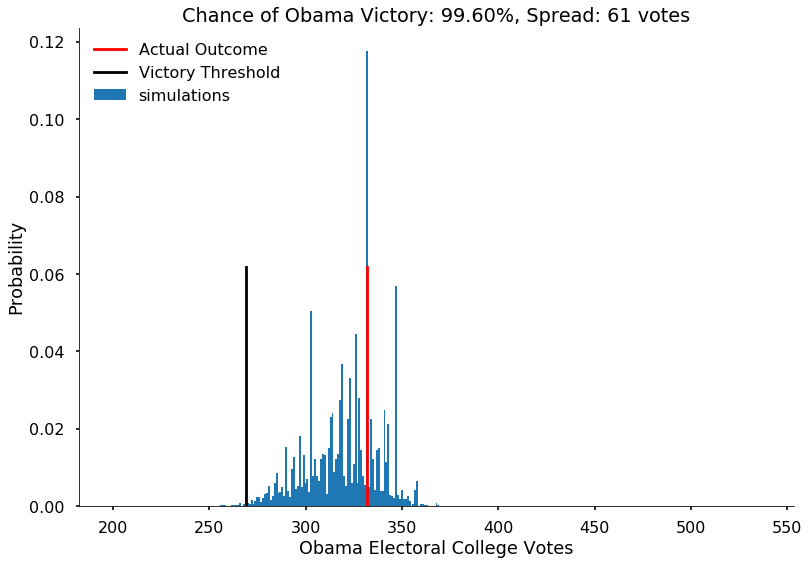

In [35]:
with sns.plotting_context('poster'):
    plot_simulation(result)

The model created by combining the probabilities we obtained from Predictwise with the simulation of a biased coin flip corresponding to the win probability in each states leads us to obtain a histogram of election outcomes. We are plotting the probabilities of a prediction, so we call this distribution over outcomes the **predictive distribution**. Simulating from our model and plotting a histogram allows us to visualize this predictive distribution. In general, such a set of probabilities is called a  **probability mass function**. 

## Empirical Distribution

This is an **empirical Probability Mass Function**. 

Lets summarize: the way the mass function arose here that we did ran 10,000 tosses (for each state), and depending on the value, assigned the state to Obama or Romney, and then summed up the electoral votes over the states.

There is a second, very useful question, we can ask of any such probability mass or probability density: what is the probability that a random variable is less than some value. In other words: $P(X < x)$. This is *also* a probability distribution and is called the **Cumulative Distribution Function**, or CDF (sometimes just called the **distribution**, as opposed to the **density**, or **mass function**). Its obtained by "summing" the probability density function for all $X$ less than $x$.

In [36]:
CDF = lambda x: np.float(np.sum(result < x))/result.shape[0]
for votes in [200, 300, 320, 340, 360, 400, 500]:
    print("CDF of Obama votes at ", votes, " votes is ", CDF(votes))

CDF of Obama votes at 200  is  0.0
CDF of Obama votes at 300  is  0.152
CDF of Obama votes at 320  is  0.4561
CDF of Obama votes at 340  is  0.8431
CDF of Obama votes at 360  is  0.9968
CDF of Obama votes at 400  is  1.0
CDF of Obama votes at 500  is  1.0


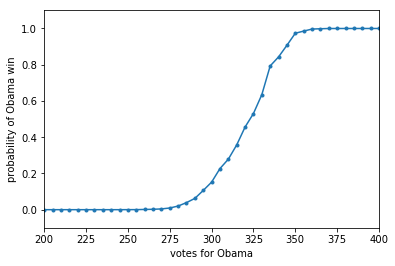

In [37]:
votelist=np.arange(0, 540, 5)
plt.plot(votelist, [CDF(v) for v in votelist], '.-');
plt.xlim([200,400])
plt.ylim([-0.1,1.1])
plt.xlabel("votes for Obama")
plt.ylabel("probability of Obama votes");